In [1]:
import pandas as pd
#used for mathematical operationd on array
import numpy as np
 #used for data science/data analysis and machine learning tasks.
import matplotlib.pyplot as plt
#data visualization and graphical plotting library for Python
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import cv2
#used to solve computer vision problems
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
#The sklearn library contains a lot of efficient
#tools for machine learning and statistical modeling including classification, regression
from keras.utils import to_categorical
from keras.models import Sequential
import tensorflow as tf
#helps you implement best practices for data automation, model tracking,
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
#Keras is used for creating deep models which can be productized

In [2]:
data1 = pd.read_csv("G://several steel detection//test.csv")
data2 = pd.read_csv("G://several steel detection//train.csv")


In [3]:
data1

,ImageId,EncodedPixels,ClassId
0,0000f269f.jpg,1 409600,0
1,000ccc2ac.jpg,1 409600,0
2,002451917.jpg,1 409600,0
3,003c5da97.jpg,1 409600,0
4,0042e163f.jpg,1 409600,0
...,...,...,...
5501,ffc9a6187.jpg,1 409600,0
5502,ffdb60677.jpg,1 409600,0
5503,ffe6e2da6.jpg,1 409600,0
5504,fff4fd9bb.jpg,1 409600,0


In [4]:
data = pd.concat([data1,data2])

In [5]:
data.shape

(12601, 3)

0    5506
3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

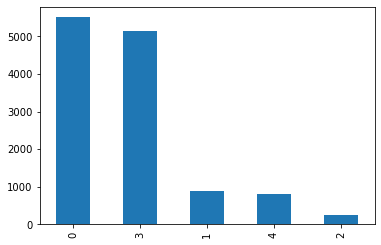

In [6]:
data["ClassId"].value_counts().plot(kind = "bar")
data["ClassId"].value_counts()


In [7]:
l1=[]
l2=[]
for ImageId,ClassId,EncodedPixels in tqdm(data2.values):
    img = cv2.imread("G://several steel detection//train_images//{}".format(ImageId),cv2.IMREAD_COLOR)
    img = cv2.resize(img,(120,120))
    l1.append(img)
    l2.append(ClassId)

100%|██████████| 7095/7095 [01:59<00:00, 59.56it/s]


In [8]:
encoder = LabelEncoder()

X= np.array(l1)
X = X/255 #converting range from 0 to 1

y = encoder.fit_transform(l2) # using label encoding
y = to_categorical(y)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True)
print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (5676, 120, 120, 3)
x_test shape: (1419, 120, 120, 3)
y_train shape: (5676, 4)
y_test shape: (1419, 4)


In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)

In [12]:



model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [13]:
history = model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test),batch_size=100,
                    verbose=1, callbacks=[early_stopping])

Epoch 1/15
57/57 [==============================] - 70s 953ms/step - loss: 0.8784 - accuracy: 0.7237 - val_loss: 0.8064 - val_accuracy: 0.7259
Epoch 2/15
57/57 [==============================] - 55s 959ms/step - loss: 0.7864 - accuracy: 0.7287 - val_loss: 0.7724 - val_accuracy: 0.7442
Epoch 3/15
57/57 [==============================] - 56s 978ms/step - loss: 0.7495 - accuracy: 0.7452 - val_loss: 0.7216 - val_accuracy: 0.7385
Epoch 4/15
57/57 [==============================] - 56s 985ms/step - loss: 0.7165 - accuracy: 0.7451 - val_loss: 0.6777 - val_accuracy: 0.7512
Epoch 5/15
57/57 [==============================] - 55s 966ms/step - loss: 0.6916 - accuracy: 0.7500 - val_loss: 0.7183 - val_accuracy: 0.7449
Epoch 6/15
57/57 [==============================] - 54s 949ms/step - loss: 0.6732 - accuracy: 0.7498 - val_loss: 0.6952 - val_accuracy: 0.7526
Epoch 7/15
57/57 [==============================] - 54s 943ms/step - loss: 0.6443 - accuracy: 0.7532 - val_loss: 0.6272 - val_accuracy: 0.7526

<AxesSubplot:title={'center':'Loss curve'}>

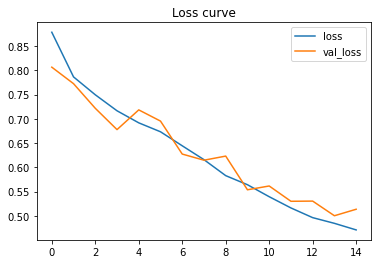

In [14]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<AxesSubplot:title={'center':'Accuracy curve'}>

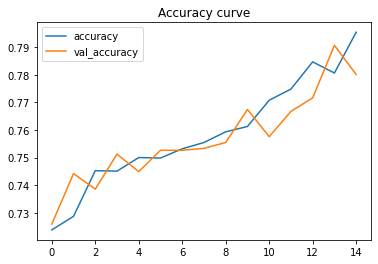

In [15]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [16]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

45/45 [==============================] - 4s 92ms/step - loss: 0.5134 - accuracy: 0.7801
[+] Accuracy: 78.01%


In [17]:
print(model)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0